In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import sklearn.decomposition as sk

In [5]:
merged_data = pd.DataFrame(pd.read_pickle('../raw_merged_data_v2'))
merged_data_1985 = pd.DataFrame(pd.read_pickle('../raw_merged_data_v2_withinyears'))
#missing_dropped = merged_data.dropna(axis=1, how='all', ignore_index=True)
#dropped = missing_dropped.drop(['Lifetime risk of maternal death (1 in: rate varies by country)', 'Lifetime risk of maternal death (%)', 'Number of maternal deaths'], axis=1)

### All data

In [4]:
merged_data

date  \
0      2019.0   
1      2015.0   
2      2010.0   
3      2000.0   
4      2022.0   
...       ...   
16943  2005.0   
16944  2010.0   
16945  2015.0   
16946  2019.0   
16947     NaN   

       Women and girls who use menstrual materials (% of women and girls ages 15-49 who had a menstrual period within the last year)  \
0                                                  94.52                                                                               
1                                                    NaN                                                                               
2                                                    NaN                                                                               
3                                                    NaN                                                                               
4                                                    NaN                                                                               
...                                                  ...                                                                               
16943                                                NaN                                                                               
16944                                                NaN                                                                               
16945                                                NaN                                                                               
16946                                                NaN                                                                               
16947                                                NaN                                                                               

       setting  \
0      Algeria   
1      Algeria   
2      Algeria   
3      Algeria   
4      Algeria   
...        ...   
16943      NIU   
16944      NIU   
16945      NIU   
16946      NIU   
16947      TKL   

       Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 5-14 (% of population ages 5-14)  \
0                                                 16.054                                                                                 
1                                                 18.055                                                                                 
2                                                 17.537                                                                                 
3                                                 20.944                                                                                 
4                                                    NaN                                                                                 
...                                                  ...                                                                                 
16943                                                NaN                                                                                 
16944                                                NaN                                                                                 
16945                                                NaN                                                                                 
16946                                                NaN                                                                                 
16947                                                NaN                                                                                 

       Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population)  \
0                                                   45.0                                                                            
1                              

In [6]:
merged_relevant = merged_data[merged_data['date'] > 1984]
merged_relevant = merged_relevant[merged_relevant['date'] < 2019]
merged_relevant = merged_relevant.drop(columns=['Maternal mortality ratio (modeled estimate, per 100,000 live births)'], axis=1)

In [ ]:
merged_features = merged_relevant.drop(columns=['Maternal mortality ratio (national estimate, per 100,000 live births)'], axis=1)

Text(0, 0.5, 'Proportion of Missing Feature Data per Year')

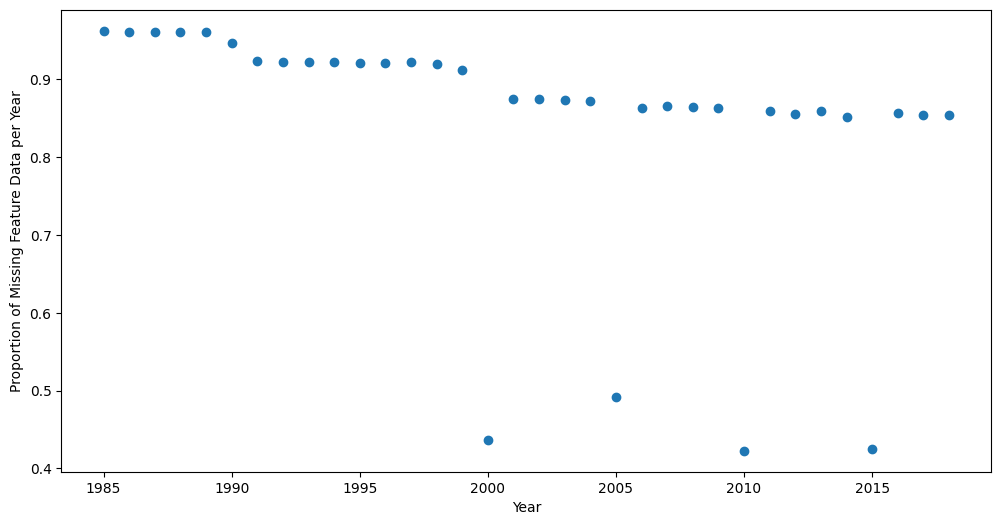

In [39]:
merged_data_peryear = (
    merged_features.groupby('date')
    .apply(lambda x: x.isna().sum().sum() / (x.shape[0] * x.shape[1]))
    .drop(columns='date', errors='ignore')  # Drop 'year' column if present
)

fig = plt.figure(figsize=(12, 6))
plt.scatter(merged_data_peryear.index, merged_data_peryear)
#plt.title('Proportion of Missing National and Modelled MMR Estimates Per Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Missing Feature Data per Year')

In [36]:
pd.DataFrame(merged_data_peryear).sort_values(by=0, ascending=True).head(10)

,0
date,
2010.0,0.422909
2015.0,0.425841
2000.0,0.436355
2005.0,0.492121
2014.0,0.851681
2017.0,0.854346
2018.0,0.854738
2012.0,0.855573
2016.0,0.856490


In [52]:
feature_missing = merged_features.isna().mean()
pd.DataFrame(feature_missing).sort_values(by=0)[160:170]

,0
"Literacy rate, youth total (% of people ages 15-24) female",0.896429
"Prevalence of stunting, height for age (% of children under 5)",0.897427
"Educational attainment, Doctoral or equivalent, population 25+ (%) (cumulative) female",0.900421
"Educational attainment, Doctoral or equivalent, population 25+ (%) (cumulative) male",0.900421
"Literacy rate, youth total (% of people ages 15-24) male",0.903415
"Prevalence of overweight, weight for height (% of children under 5)",0.905855
Trained teachers in preprimary education (% of total teachers) female,0.908073
2.E.06 Other neurological disorders prevalence (age standardized) (per 100 000 population) male,0.913950
2.F.0 Mental disorders prevalence (age standardized) (per 100 000 population) female,0.913950
2.E.07 Headache disorders prevalence (age standardized) (per 100 000 population) male,0.913950


### Correlation Between Features

In [9]:
without_setting = merged_features.drop(columns=['setting'], axis=1)

In [12]:
f_corr = without_setting.corr()
upper_tri = f_corr.where(
    ~np.tril(np.ones(f_corr.shape)).astype(bool)
)

# Flatten and drop NaNs
correlation_values = upper_tri.stack().values

Text(0, 0.5, 'Frequency')

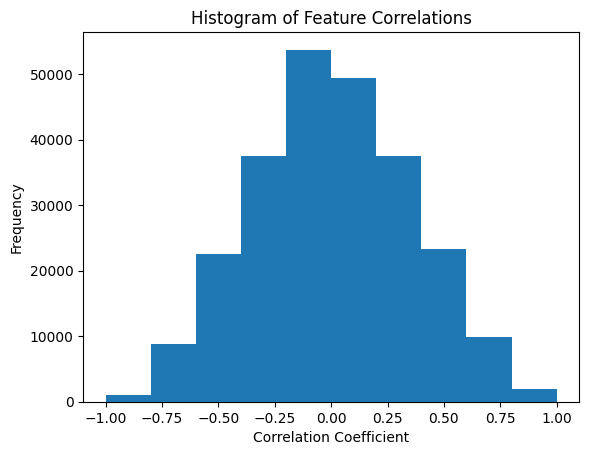

In [70]:
plt.hist(correlation_values)
plt.title('Histogram of Feature Correlations')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')

In [86]:
high_correlations = upper_tri.stack().reset_index()
high_correlations.columns = ['feature1', 'feature2', 'correlation']
high_correlations = high_correlations[high_correlations['correlation'].abs() > 0.8]
high_correlations.reset_index(drop=True, inplace=True)
high_correlations

,feature1,feature2,correlation
0,Women and girls who use menstrual materials (%...,Women participating in own health care decisio...,0.968715
1,Women and girls who use menstrual materials (%...,Knowledge of any method of contraception (% of...,1.000000
2,Women and girls who use menstrual materials (%...,Demand for family planning satisfied by any me...,0.995970
3,Women and girls who use menstrual materials (%...,Knowledge of any modern method of contraceptio...,1.000000
4,Women and girls who use menstrual materials (%...,Women participating in none of the three decis...,-0.968308
...,...,...,...
2939,Trained teachers in secondary education (% of ...,Trained teachers in upper secondary education ...,0.942196
2940,Trained teachers in upper secondary education ...,Trained teachers in upper secondary education ...,0.962822
2941,Trained teachers in primary education (% of to...,Trained teachers in primary education (% of to...,0.907572
2942,Land area where elevation is below 5 meters (%...,Population living in areas where elevation is ...,0.802325


In [87]:
missing_data = pd.DataFrame(index = high_correlations.index, columns=['feature1_missing', 'feature2_missing'])
for i, row in high_correlations.iterrows():
    feature1 = row['feature1']
    feature2 = row['feature2']
    missing_data.at[i, 'feature1_missing'] = merged_features[feature1].isna().mean()
    missing_data.at[i, 'feature2_missing'] = merged_features[feature2].isna().mean()
high_correlations = pd.concat([high_correlations, missing_data], axis=1)
high_correlations 

,feature1,feature2,correlation,feature1_missing,feature2_missing
0,Women and girls who use menstrual materials (%...,Women participating in own health care decisio...,0.968715,0.996895,0.98126
1,Women and girls who use menstrual materials (%...,Knowledge of any method of contraception (% of...,1.000000,0.996895,0.973608
2,Women and girls who use menstrual materials (%...,Demand for family planning satisfied by any me...,0.995970,0.996895,0.970725
3,Women and girls who use menstrual materials (%...,Knowledge of any modern method of contraceptio...,1.000000,0.996895,0.973608
4,Women and girls who use menstrual materials (%...,Women participating in none of the three decis...,-0.968308,0.996895,0.981371
...,...,...,...,...,...
2939,Trained teachers in secondary education (% of ...,Trained teachers in upper secondary education ...,0.942196,0.916944,0.940452
2940,Trained teachers in upper secondary education ...,Trained teachers in upper secondary education ...,0.962822,0.940452,0.940452
2941,Trained teachers in primary education (% of to...,Trained teachers in primary education (% of to...,0.907572,0.866933,0.866933
2942,Land area where elevation is below 5 meters (%...,Population living in areas where elevation is ...,0.802325,0.93513,0.93513


In [88]:
differing_missingness = pd.DataFrame(index = high_correlations.index, columns=['correlation', 'feature1', 'feature1_missing', 'feature2', 'feature2_missing'])
for i, row in high_correlations.iterrows():
    if abs(row['feature1_missing'] - row['feature2_missing']) > 0.2:
        differing_missingness.at[i, 'correlation'] = row['correlation']
        differing_missingness.at[i, 'feature1'] = row['feature1']
        differing_missingness.at[i, 'feature1_missing'] = row['feature1_missing']
        differing_missingness.at[i, 'feature2'] = row['feature2']
        differing_missingness.at[i, 'feature2_missing'] = row['feature2_missing']

differing_missingness = differing_missingness.dropna().reset_index(drop=True)

differing_missingness 


,correlation,feature1,feature1_missing,feature2,feature2_missing
0,0.837638,"Cause of death, by communicable diseases and m...",0.923819,"Mortality rate, infant (per 1,000 live births)",0.106676
1,-0.86764,"Cause of death, by communicable diseases and m...",0.923819,"Survival to age 65, female (% of cohort)",0.000887
2,0.818838,"Cause of death, by communicable diseases and m...",0.923819,"Mortality rate, under-5, male (per 1,000 live ...",0.106676
3,0.835218,"Cause of death, by communicable diseases and m...",0.923819,"Mortality rate, infant, female (per 1,000 live...",0.106676
4,0.812805,"Cause of death, by communicable diseases and m...",0.923819,"Mortality rate, under-5, female (per 1,000 liv...",0.106676
...,...,...,...,...,...
780,-0.812223,"School enrollment, secondary (% net) male",0.754935,"Self-employed, total (% of total employment) (...",0.441118
781,-0.813865,"School enrollment, secondary (% net) male",0.754935,Vulnerable employment (% of total employment) ...,0.441118
782,0.812223,"School enrollment, secondary (% net) male",0.754935,Wage and salaried workers (% of total employme...,0.441118
783,0.808789,Unemployment (% of total labor force) (modeled...,0.441118,Unemployment with intermediate education (% of...,0.799179


In [82]:
feature_counts = {}

for i, row in differing_missingness.iterrows():
    feature1 = row['feature1']
    feature2 = row['feature2']
    if feature1 not in feature_counts:
        feature_counts[feature1] = 0
    if feature2 not in feature_counts:
        feature_counts[feature2] = 0
    feature_counts[feature1] += 1
    feature_counts[feature2] += 1

feature_counts_df = pd.DataFrame(index = feature_counts.keys(), data=feature_counts.values(), columns=['count']).sort_values(by='count', ascending=False)
feature_counts_df

,count
"Mortality rate, infant, male (per 1,000 live births)",57
"Mortality rate, infant (per 1,000 live births)",57
"Mortality rate, under-5, male (per 1,000 live births)",52
"Mortality rate, infant, female (per 1,000 live births)",52
"Mortality rate, under-5 (per 1,000 live births)",49
...,...
Women and girls who participate in activities during menstrual period (% of women and girls ages 15-49 who had a menstrual period within the last year),1
Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant),1
"Prevalence of underweight, weight for age, female (% of children under 5)",1
1.D.14 Intestinal nematode infections prevalence (age standardized) (per 100 000 population) female,1


In [ ]:
best_pairings = pd.DataFrame(index=feature_counts_df.index, columns=['pairing', 'correlation', 'missing1', 'missing2'])
for indicator in feature_counts_df.index:
    pairing_highest_correlation1 = high_correlations[high_correlations['feature1'] == indicator].sort_values(by='correlation', ascending=False).iloc[0]
    pairing_highest_correlation2 = high_correlations[high_correlations['feature1'] == indicator].sort_values(by='correlation', ascending=False).iloc[0]
    best = max(abs(pairing_highest_correlation1), abs(pairing_highest_correlation2))
    best_pairings.at[indicator, 'pairing'] = max(abs(pairing_highest_correlation1), abs(pairing_highest_correlation2))
    best_pairings.at[indicator, 'correlation']

#### MMR Correlation

In [56]:
mmr_without_setting = merged_relevant.drop(columns=['setting'], axis=1)
f_corr_mmr = mmr_without_setting.corr()
upper_tri_mmr = f_corr_mmr.where(
    ~np.tril(np.ones(f_corr_mmr.shape)).astype(bool)
)

# Flatten and drop NaNs
correlation_values_mmr = upper_tri_mmr.stack().values
high_correlations_mmr = upper_tri_mmr.stack().reset_index()
high_correlations_mmr.columns = ['feature1', 'feature2', 'correlation']
high_correlations_mmr = high_correlations_mmr[high_correlations_mmr['correlation'].abs() > 0.8]

In [57]:
mmr_column = 'Maternal mortality ratio (national estimate, per 100,000 live births)'
mmr_correlations = high_correlations_mmr[
    (high_correlations_mmr['feature1'] == mmr_column) | (high_correlations_mmr['feature2'] == mmr_column)
]
mmr_correlations

,feature1,feature2,correlation
853,Women and girls who use menstrual materials (%...,"Maternal mortality ratio (national estimate, p...",0.995959
31998,"Probability of Survival to Age 5, Male","Maternal mortality ratio (national estimate, p...",-0.867237
34149,"Cause of death, by communicable diseases and m...","Maternal mortality ratio (national estimate, p...",0.839348
38685,Lifetime risk of maternal death (%),"Maternal mortality ratio (national estimate, p...",0.925220
41257,"Cause of death, by communicable diseases and m...","Maternal mortality ratio (national estimate, p...",0.839713
52248,"Cause of death, by non-communicable diseases, ...","Maternal mortality ratio (national estimate, p...",-0.825153
61663,"Probability of Survival to Age 5, Female","Maternal mortality ratio (national estimate, p...",-0.867849
75275,"Cause of death, by communicable diseases and m...","Maternal mortality ratio (national estimate, p...",0.835702
90669,Probability of Survival to Age 5,"Maternal mortality ratio (national estimate, p...",-0.869512
111827,"Maternal mortality ratio (national estimate, p...",1.F.01 Maternal disorders prevalence (age stan...,0.848600


### MMR Trends

Text(0.5, 1.0, 'National Maternal Mortality Ratio Over Time')

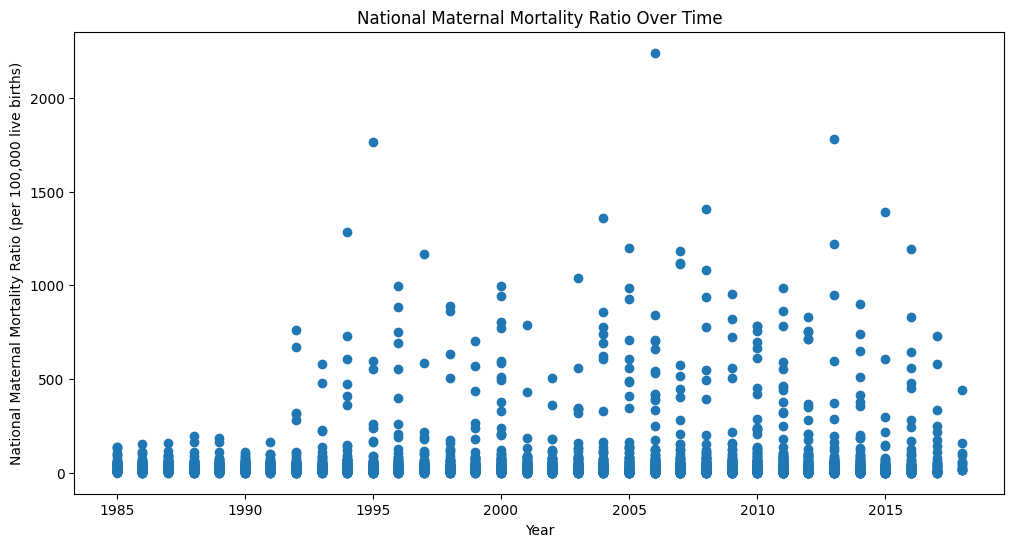

In [ ]:
fig = plt.figure(figsize=(12, 6))
 
plt.scatter(merged_relevant['date'], merged_relevant['Maternal mortality ratio (national estimate, per 100,000 live births)'])
plt.xlabel('Year')
plt.ylabel('National Maternal Mortality Ratio (per 100,000 live births)')
plt.title('National Maternal Mortality Ratio Over Time')

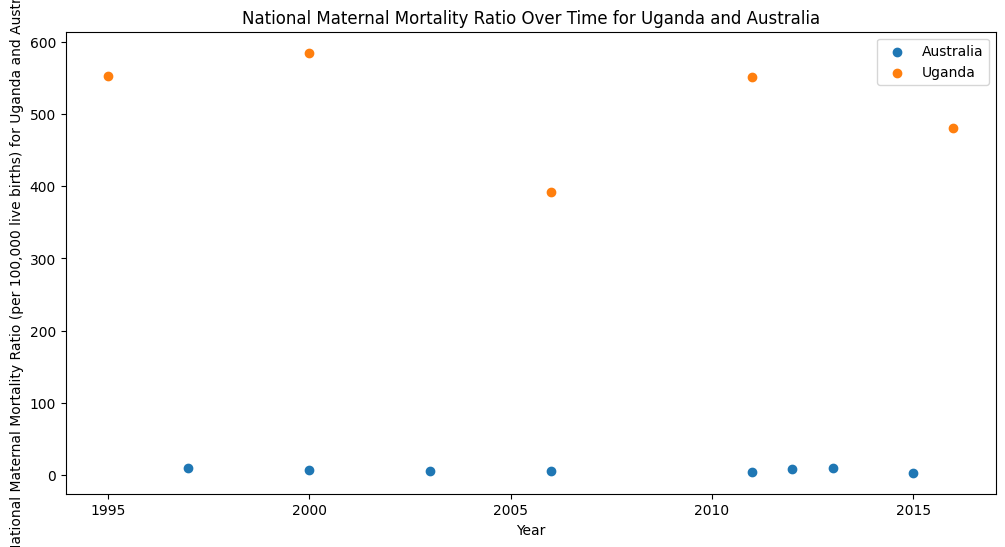

In [48]:
fig = plt.figure(figsize=(12, 6))

plt.scatter(merged_relevant[merged_relevant['setting'] == 'Australia']['date'], merged_relevant[merged_relevant['setting'] == 'Australia']['Maternal mortality ratio (national estimate, per 100,000 live births)'] ,label='Australia')
plt.scatter(merged_relevant[merged_relevant['setting'] == 'Uganda']['date'], merged_relevant[merged_relevant['setting'] == 'Uganda']['Maternal mortality ratio (national estimate, per 100,000 live births)'], label='Uganda')
plt.xlabel('Year')
plt.ylabel('National Maternal Mortality Ratio (per 100,000 live births) for Uganda and Australia')
plt.title('National Maternal Mortality Ratio Over Time for Uganda and Australia')
plt.legend()

Text(0.5, 1.0, 'National Maternal Mortality Ratio Over Time for Tanzania')

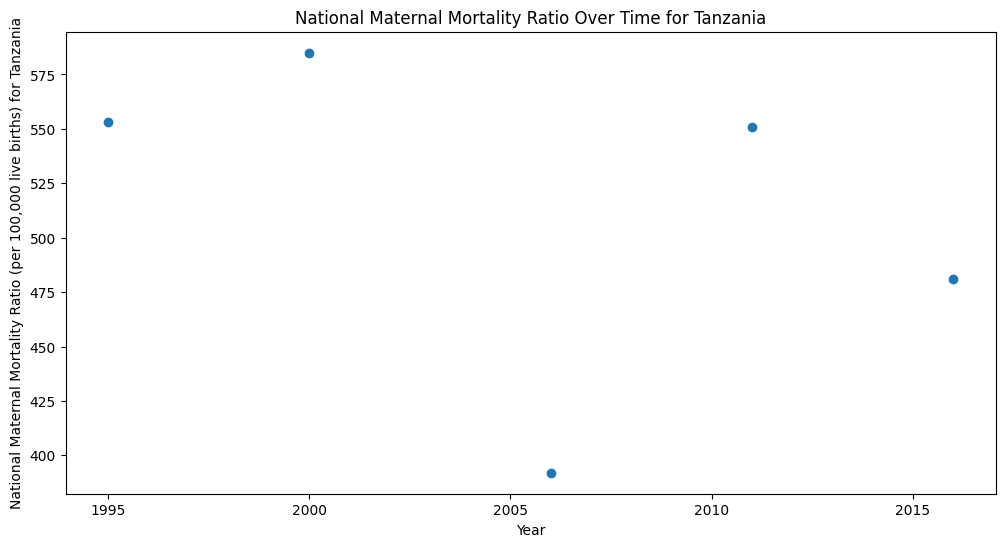

In [ ]:
fig = plt.figure(figsize=(12, 6))

plt.scatter(merged_relevant[merged_relevant['setting'] == 'Uganda']['date'], merged_relevant[merged_relevant['setting'] == 'Uganda']['Maternal mortality ratio (national estimate, per 100,000 live births)'])
plt.xlabel('Year')
plt.ylabel('National Maternal Mortality Ratio (per 100,000 live births) for Tanzania')
plt.title('National Maternal Mortality Ratio Over Time for Uganda')